In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network, base
import matplotlib.pyplot as plt

import importlib
import datetime
import mlTest
import preprocessing
importlib.reload(mlTest)
importlib.reload(preprocessing)

<module 'preprocessing' from 'C:\\Users\\Chunlok Lo\\Documents\\cs4641\\supervised_learning\\implementation\\preprocessing.py'>

In [3]:
df = pd.read_csv("data/car.data", header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [13]:
df[0] = pd.Categorical(df[0])
df[0].cat.codes
df[0].cat.codes[1000]

2

In [31]:
X, y = preprocessing.XySplit(df, 9)
X_train, X_val, X_test, X_train_val, y_train, y_val, y_test, y_train_val = mlTest.train_val_test_split(X, y, train_size=0.8, val_size=0.1)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [32]:
y.describe()

count    1473.000000
mean        1.919891
std         0.876376
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: 9, dtype: float64

Initial Performance Testing:

[[51  8 10]
 [11 13 12]
 [11  7 25]]
0.6013513513513513


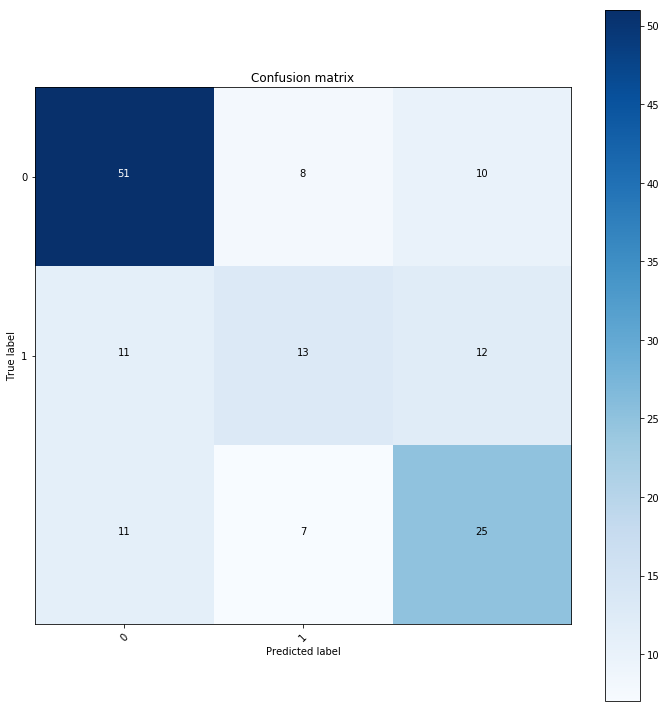

In [33]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

Processing Param Val: 0.036666666666666665
0.5584657340784299
0.003333333333333333


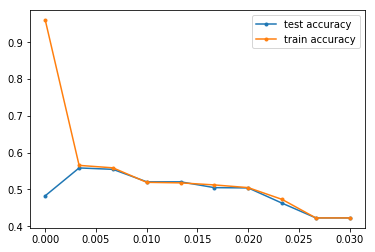

In [38]:
param = ('min_impurity_decrease', np.linspace(0, .03, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="impurity-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="impurity-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="impurity-vals")

[[38  5 13]
 [ 4 16 16]
 [21 11 24]]


(array([[38,  5, 13],
        [ 4, 16, 16],
        [21, 11, 24]], dtype=int64), 0.527027027027027)

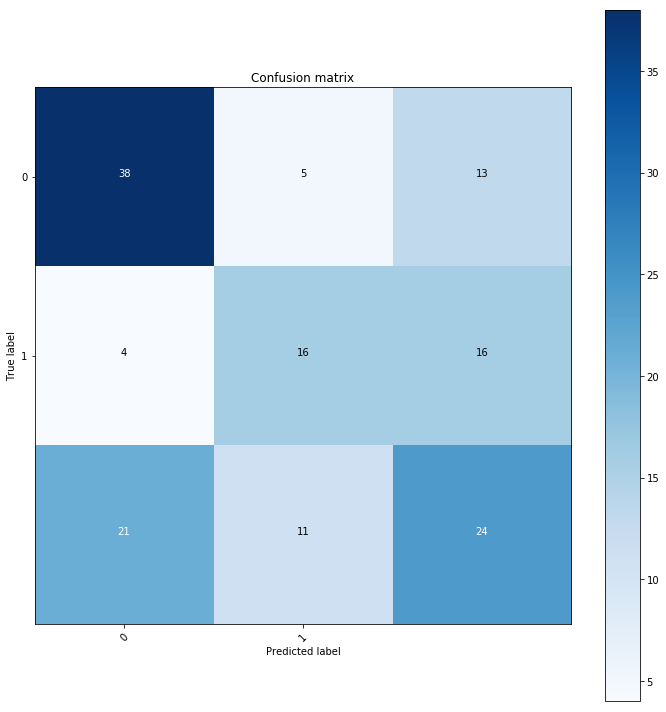

In [8]:
clf = ensemble.AdaBoostClassifier(random_state=0, n_estimators=200)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

[[55  0  1]
 [36  0  0]
 [53  0  3]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(array([[55,  0,  1],
        [36,  0,  0],
        [53,  0,  3]], dtype=int64), 0.3918918918918919)

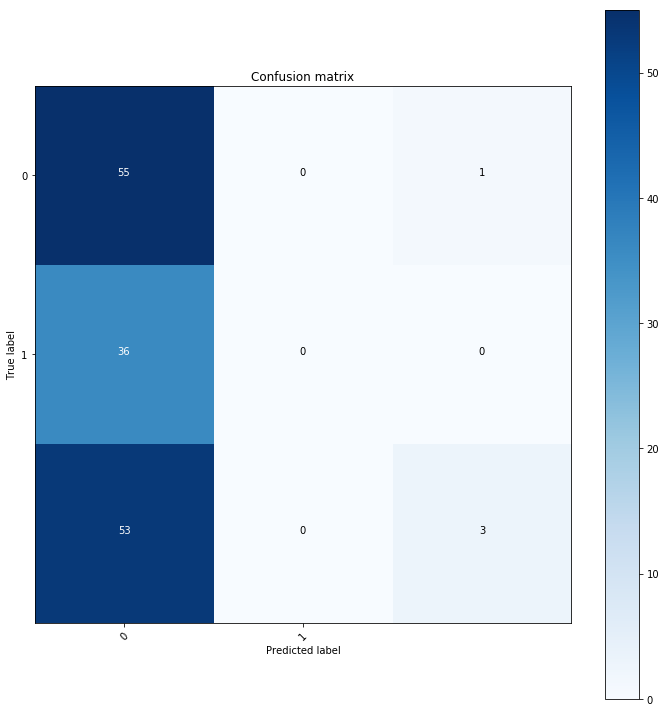

In [9]:
clf = svm.LinearSVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

[[36  4 16]
 [ 9 17 10]
 [19  9 28]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(array([[36,  4, 16],
        [ 9, 17, 10],
        [19,  9, 28]], dtype=int64), 0.5472972972972973)

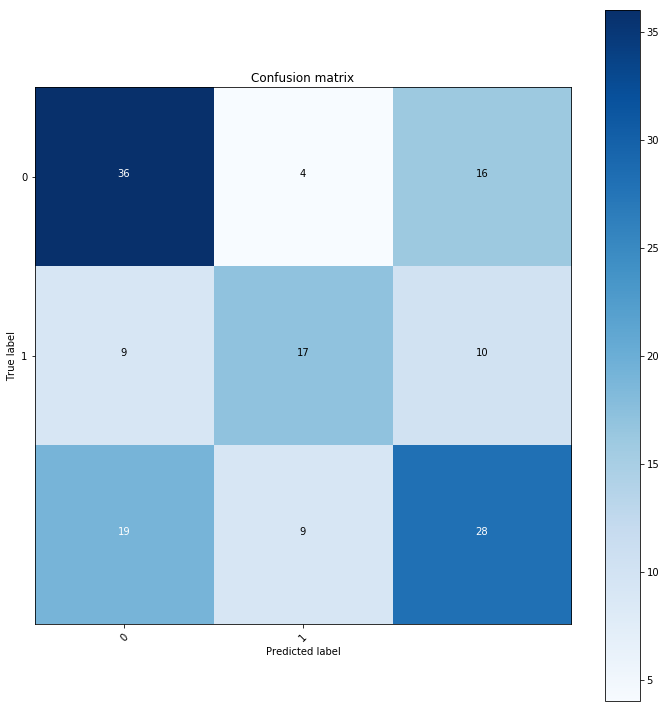

In [10]:
clf = svm.SVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np

model = Sequential()
model.add(Dense(10,input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train.values, y_train.values, epochs=200, validation_data=(X_val.values, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/200
15216/15216 [==============================] - 3s 218us/step - loss: 5.7148 - acc: 0.0387 - val_loss: 5.5507 - val_acc: 0.0358
Epoch 2/200
15216/15216 [==============================] - 3s 165us/step - loss: 5.7148 - acc: 0.0387 - val_loss: 5.5507 - val_acc: 0.0358
Epoch 3/200
 6176/15216 [===========>..................] - ETA: 1s - loss: 5.7468 - acc: 0.0368

KeyboardInterrupt: 

[[36  6 14]
 [14 14  8]
 [22 13 21]]
0.4797297297297297


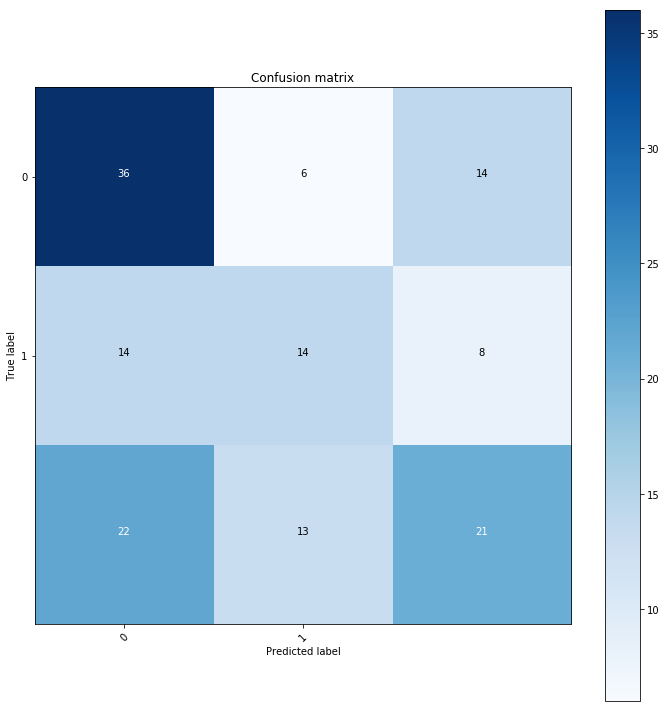

In [11]:
clf = neighbors.KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

[[29  0 27]
 [ 8  0 28]
 [14  0 42]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(array([[29,  0, 27],
        [ 8,  0, 28],
        [14,  0, 42]], dtype=int64), 0.4797297297297297)

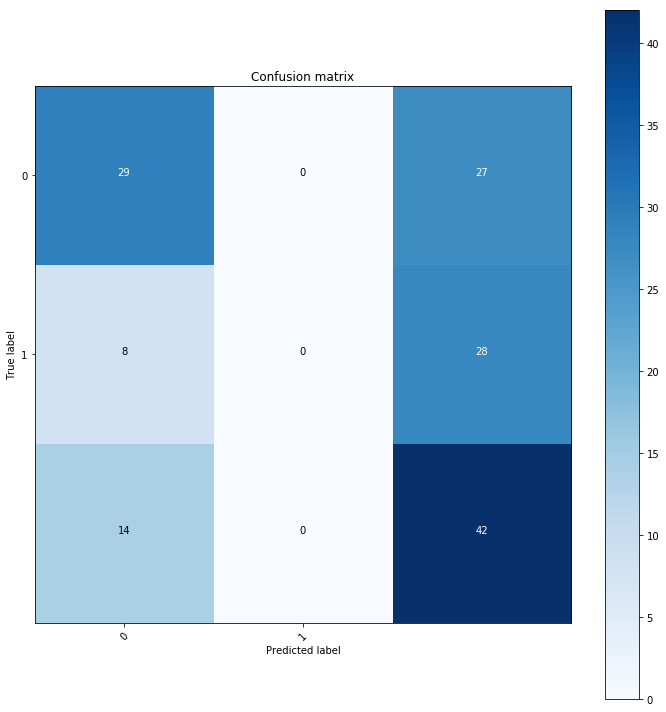

In [12]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

Algorithm Testing:

Decision Tree Classifier:
Testing: Pruning parameter min_impurity_decrease
Testing: Max Depth

0.8488141601621176
0.00022222222222222223


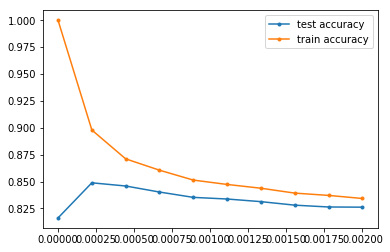

In [62]:
param = ('min_impurity_decrease', np.linspace(0, .002, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="impurity-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="impurity-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="impurity-vals")

Processing Param Val: 20.088888888888899
0.8437911029239062
9.444444444444445


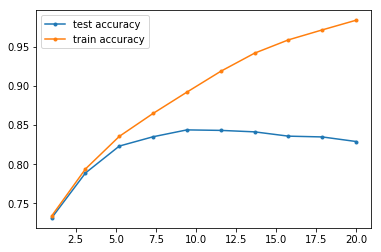

In [64]:
param = ('max_depth', np.linspace(1, 20, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="max_depth-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="max_depth-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="max_depth-vals")

Min impurity decrease with max depth did not improve performance. So I just left it out.

Processing Param Val: 0.00277777777777777797
0.8505084267821736
0.0006666666666666668


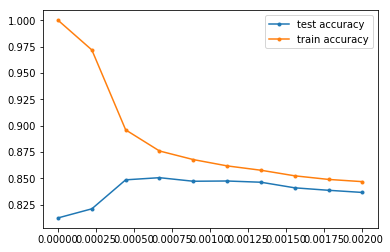

In [66]:
param = ('min_impurity_decrease', np.linspace(0, .002, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="impurity-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="impurity-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="impurity-vals")

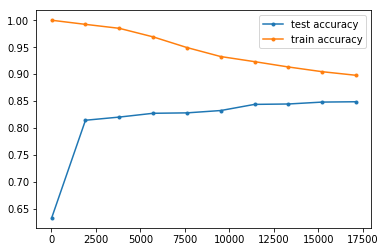

In [75]:
#clf = tree.DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.00022222222222222223)
#train_acc, test_acc, train_samples = mlTest.accuracy_vs_num_train_samples(clf, X_train_val, y_train_val, min_train_num=20)
mlTest.plot_accuracy(train_acc, test_acc, train_samples)

In [76]:
mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="tuned-train_acc")
mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="tuned-test_acc")
mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="tuned-vals")

ADA BOOST TESTING


Testing: n_estimators
learning rate?

Processing Param Val: 80
0.8447843908837515
80


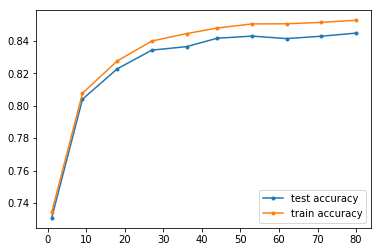

In [6]:
param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "MAGIC-ADABoost", descriptors="n_estimators-train_acc")
mlTest.saveNpArray(test_acc, "MAGIC-ADABoost", descriptors="n_estimators-test_acc")
mlTest.saveNpArray(param_vals, "MAGIC-ADABoost", descriptors="n_estimators-vals")

Processing Param Val: 80
0.8492232776372785
150


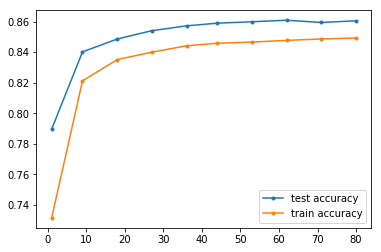

In [96]:
param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0)
train_acc1, test_acc1, param_vals1 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(test_acc, test_acc1, param_vals1)
mlTest.saveNpArray(train_acc1, "MAGIC-decisionTree", descriptors="n_estimators-train_acc-depth2")
mlTest.saveNpArray(test_acc1, "MAGIC-decisionTree", descriptors="n_estimators-test_acc-depth2")
mlTest.saveNpArray(param_vals1, "MAGIC-decisionTree", descriptors="n_estimators-vals-depth2")

0.8685598819076127
53


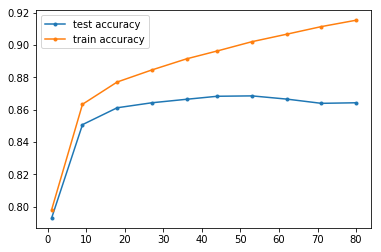

In [19]:
#param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
#classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=3), random_state=0)
#train_acc3, test_acc3, param_vals3 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc3))
print(param_vals3[np.argmax(test_acc3)])
mlTest.plot_accuracy(train_acc3, test_acc3, param_vals3)
mlTest.saveNpArray(train_acc3, "MAGIC-adaboost", descriptors="learning_rate-train_acc-depth3")
mlTest.saveNpArray(test_acc3, "MAGIC-adaboost", descriptors="learning_rate-test_acc-depth3")
mlTest.saveNpArray(param_vals3, "MAGIC-adaboost", descriptors="learning_rate-vals-depth3")

0.8623097794916893
18


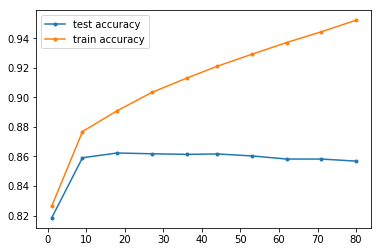

In [21]:
#\param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
#classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=4), random_state=0)
#train_acc4, test_acc4, param_vals4 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc4))
print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc4, test_acc4, param_vals4)
mlTest.saveNpArray(train_acc4, "MAGIC-adaboost", descriptors="learning_rate-train_acc-depth4")
mlTest.saveNpArray(test_acc4, "MAGIC-adaboost", descriptors="learning_rate-test_acc-depth4")
mlTest.saveNpArray(param_vals4, "MAGIC-adaboost", descriptors="learning_rate-vals-depth4")

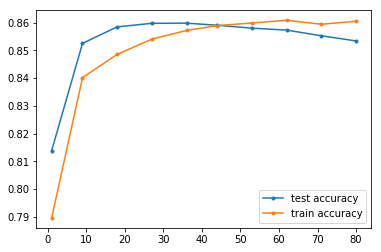

In [94]:
mlTest.plot_accuracy(test_acc1, test_acc3, param_vals3)

In [7]:
param = ('learning_rate', np.linspace(1, 0, num=10))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(test_acc, test_acc1, param_vals1)
# mlTest.saveNpArray(train_acc1, "MAGIC-adaboost", descriptors="learning_rate-train_acc-depth2")
# mlTest.saveNpArray(test_acc1, "MAGIC-adaboost", descriptors="learning_rate-test_acc-depth2")
# mlTest.saveNpArray(param_vals1, "MAGIC-adaboost", descriptors="learning_rate-vals-depth2")

KeyboardInterrupt: 

In [9]:
acc1 = np.load("npData/20190206-132640-MAGIC-ADABoost-n_estimators-test_acc.npy")
acc2 = np.load("npData/20190206-021010_MAGIC-adaboost_n_estimators-test_acc-depth2.npy")
acc3 = np.load("npData/20190206-120107-MAGIC-adaboost-learning_rate-test_acc-depth3.npy")
acc4 = np.load("npData/20190206-120139-MAGIC-adaboost-learning_rate-test_acc-depth4.npy")

In [14]:
vals2 = np.load("npData/20190206-021010_MAGIC-adaboost_n_estimators-vals-depth2.npy")

In [15]:
vals[np.argmax(acc)]

62

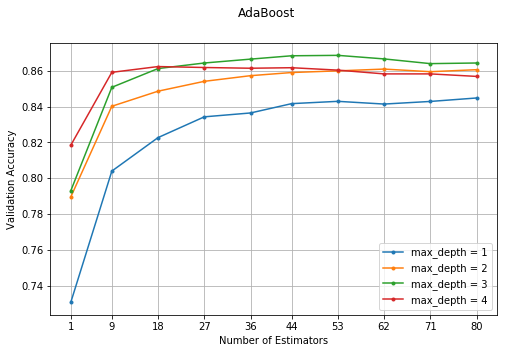

In [40]:
fig = plt.figure()
fig.set_size_inches(8, 5)
plt.plot(param_vals, acc1, label='max_depth = 1', marker='.')
plt.plot(param_vals, acc2, label='max_depth = 2', marker='.')
plt.plot(param_vals, acc3, label='max_depth = 3', marker='.')
plt.plot(param_vals, acc4, label='max_depth = 4', marker='.')
plt.legend()
plt.grid()
plt.xticks(param_vals)
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Accuracy')
plt.suptitle("AdaBoost")
plt.show()

[[1136   87]
 [ 188  491]]


(array([[1136,   87],
        [ 188,  491]], dtype=int64), 0.8554153522607781)

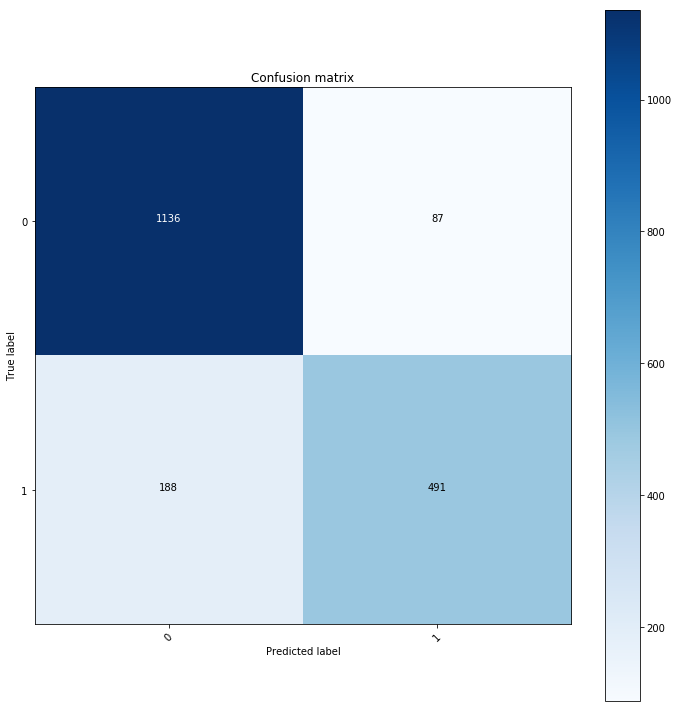

In [41]:
clf = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=3), random_state=0, n_estimators=53)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

SVM TESTING

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



0.7868326460676244
0.01


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


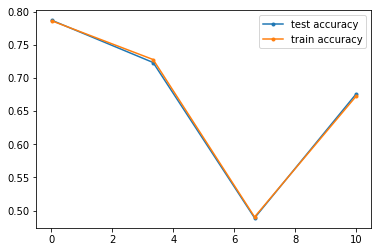

In [11]:
param = ('C', np.linspace(.01, 10, num=4))
classifier = svm.LinearSVC(random_state=0, max_iter=8000)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=2)
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
#mlTest.saveNpArray(train_acc, "MAGIC-ADABoost", descriptors="n_estimators-train_acc")
#mlTest.saveNpArray(test_acc, "MAGIC-ADABoost", descriptors="n_estimators-test_acc")
#mlTest.saveNpArray(param_vals, "MAGIC-ADABoost", descriptors="n_estimators-vals")